In [1]:
import numpy as np
import pandas as pd

# This is their high-level library, meant for doing things "quickly" and "simply"
import plotly.express as px

# This is a lower-level library, giving you more control and customization options
import plotly.graph_objects as go

# If you want to export static figures
try:
    import kaleido
except:
    !pip install kaleido
    import kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 16.4 MB/s eta 0:00:0000:01:00:01


In [2]:
data = pd.read_csv("netflix.csv")
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429
...,...,...,...,...,...,...,...
4876,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998
4877,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976
4878,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976
4879,2021-10-08,643.799988,630.859985,634.169983,632.659973,3271100.0,632.659973


In [4]:
data["Fluctuation"] = data["High"] - data["Low"]
data

,Date,High,Low,Open,Close,Volume,Adj Close,Fluctuation
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429,0.097143
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000,0.027857
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143,0.075000
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571,0.078572
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429,0.036428
...,...,...,...,...,...,...,...,...
4876,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998,33.500000
4877,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976,13.510010
4878,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976,16.390015
4879,2021-10-08,643.799988,630.859985,634.169983,632.659973,3271100.0,632.659973,12.940002


In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Day'] = data['Date'].dt.day
data

,Date,High,Low,Open,Close,Volume,Adj Close,Fluctuation,Year,Day
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429,0.097143,2002,23
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000,0.027857,2002,24
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143,0.075000,2002,28
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571,0.078572,2002,29
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429,0.036428,2002,30
...,...,...,...,...,...,...,...,...,...,...
4876,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998,33.500000,2021,5
4877,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976,13.510010,2021,6
4878,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976,16.390015,2021,7
4879,2021-10-08,643.799988,630.859985,634.169983,632.659973,3271100.0,632.659973,12.940002,2021,8


In [6]:
days_per_year = data.groupby('Year')['Date'].nunique()

# Print the result
print(days_per_year)


Year
2002    154
2003    252
2004    252
2005    252
2006    251
2007    251
2008    253
2009    252
2010    252
2011    252
2012    250
2013    252
2014    252
2015    252
2016    252
2017    251
2018    251
2019    252
2020    253
2021    195
Name: Date, dtype: int64


In [44]:
data.groupby('Year')['Adj Close'].mean()


Year
2002      0.850172
2003      2.081205
2004      3.413430
2005      2.597262
2006      3.690996
2007      3.123933
2008      4.094670
2009      6.322035
2010     16.824172
2011     27.493719
2012     11.855057
2013     35.271831
2014     57.495119
2015     91.895674
2016    102.030357
2017    165.374263
2018    319.290319
2019    328.872380
2020    446.827233
2021    534.163589
Name: Adj Close, dtype: float64

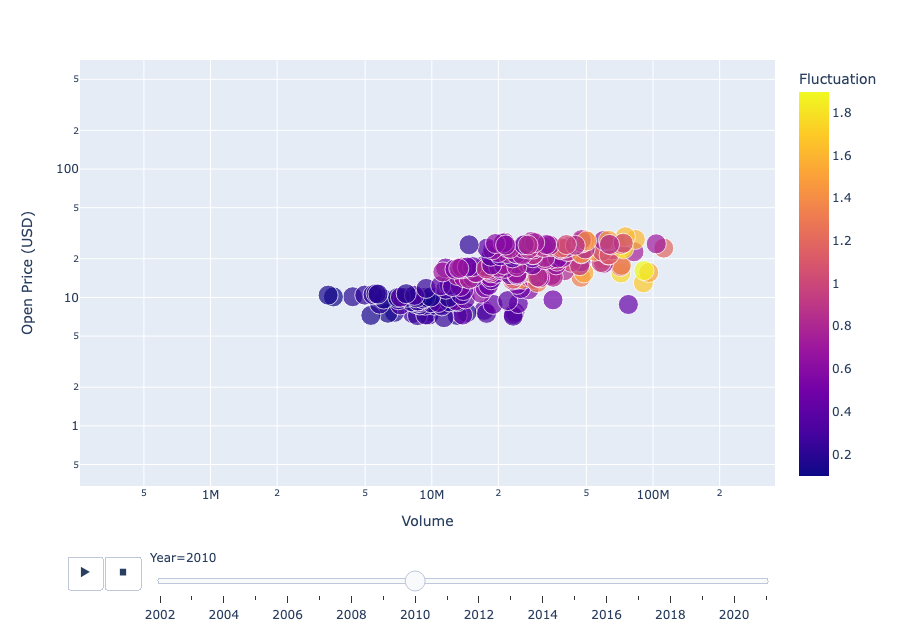

In [46]:
x = 'Volume'
y = 'Open'
xname = 'Volume'
yname = 'Open Price (USD)'

fig = px.scatter(width=800,
                 height=640,
                 data_frame=data,
                 x=x,
                 y=y,
                 size='Mean Adj Close',
                 color='Fluctuation',
                 hover_name='Day',
                 animation_frame='Year',
                 log_x=True,
                 log_y = True,
                 size_max=80,
                 range_x = [data[x].min()*0.9, data[x].max()*1.1],
                 range_y = [data[y].min()*0.9, data[y].max()*1.1]
                )
# See: https://plotly.com/python/reference/layout/
# for more options
fig.update_layout(xaxis_title=xname, 
                  yaxis_title=yname
                 )
fig